In [1]:
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import pickle
import glob
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
reload(sa)
reload(sc)
import random

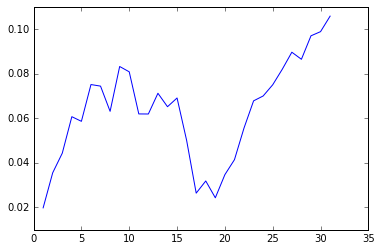

In [87]:
testMaxSimps = []
for t in range(12):
    testMaxSimps.append(tuple(range(t+1, 5+t)))
    
ms = []
ntrianglesMax = 32

KLsave = []
d=1
beta = 0.1
Edata = sc.simplicialChainGroups(testMaxSimps)
for n in range(1, ntrianglesMax):
    ms = []
    for t in range(n):
        ms.append(tuple(range(t+1, 4+t)))
    #print(ms)
    Emodel = sc.simplicialChainGroups(ms)
    Ecomb = sc.simplexUnion(Edata, Emodel)
    Ddata = sc.maskedBoundaryOperatorMatrix(Ecomb, Edata)
    Dsamp = sc.maskedBoundaryOperatorMatrix(Ecomb, Emodel)
        
    Lsamp = sc.laplacian(Dsamp, d)
    Ldata = sc.laplacian(Ddata, d)
    rsamp = sc.densityMatrix(Lsamp, beta)        
    rdata = sc.densityMatrix(Ldata, beta)
        
    KLsave.append(sc.KLdivergence(rdata, rsamp))


plt.plot(range(1, 1+len(KLsave)),KLsave)

In [44]:
Emodel[2]

[(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]

In [45]:
Edata[2]

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (5, 6), (5, 7), (6, 7)]

In [47]:
Ddata[1]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0., -1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [48]:
Dsamp[1]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0., -1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [50]:
Ecomb[2]

[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5)]

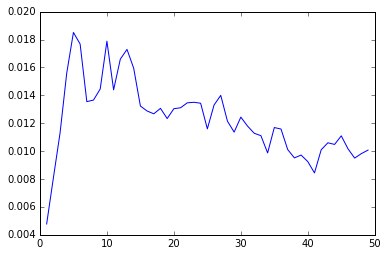

In [81]:
tms = []
for t in range(32):
    tms.append(tuple(range(t+1, 4+t)))
    
testMaxSimps = random.sample(tms, 4)
ms = []
ntrianglesMax = 50

KLsave = []
d=1
beta = 0.05
Edata = sc.simplicialChainGroups(testMaxSimps)
for n in range(1, ntrianglesMax):
    ms = []
    for t in range(n):
        ms.append(tuple(range(t+1, 4+t)))
    #print(ms)
    Emodel = sc.simplicialChainGroups(ms)
    Ecomb = sc.simplexUnion(Edata, Emodel)
    Ddata = sc.maskedBoundaryOperatorMatrix(Ecomb, Edata)
    Dsamp = sc.maskedBoundaryOperatorMatrix(Ecomb, Emodel)
        
    Lsamp = sc.laplacian(Dsamp, d)
    Ldata = sc.laplacian(Ddata, d)
    rsamp = sc.densityMatrix(Lsamp, beta)        
    rdata = sc.densityMatrix(Ldata, beta)
        
    KLsave.append(sc.KLdivergence(rdata, rsamp))


plt.plot(range(1, 1+len(KLsave)),KLsave)

In [79]:
testMaxSimps

[(17, 18, 19), (10, 11, 12), (6, 7, 8), (23, 24, 25)]

In [33]:
testMaxSimps = [(1,2,3)]
ms = [(4,5,6,7)]
d=1
beta = 0.15
Edata = sc.simplicialChainGroups(testMaxSimps)

Emodel = sc.simplicialChainGroups(ms)
Ecomb = sc.simplexUnion(Edata, Emodel)
Ddata = sc.maskedBoundaryOperatorMatrix(Ecomb, Edata)
Dsamp = sc.maskedBoundaryOperatorMatrix(Ecomb, Emodel)

Dd2 = sc.boundaryOperatorMatrix(Edata)
Ds2 = sc.boundaryOperatorMatrix(Emodel)

Ls2 = sc.laplacian(Ds2, d)
Ld2 = sc.laplacian(Dd2, d)

rs2 = sc.densityMatrix(Ls2, beta)
rd2 = sc.densityMatrix(Ld2, beta)
        
Lsamp = sc.laplacian(Dsamp, d)
Ldata = sc.laplacian(Ddata, d)
rsamp = sc.densityMatrix(Lsamp, beta)        
rdata = sc.densityMatrix(Ldata, beta)
print(sc.KLdivergence(rdata, rsamp))
print(sc.KLdivergence(rs2, rd2))

0.180367160522


ValueError: operands could not be broadcast together with shapes (6,) (3,) 

In [34]:
Ld2

array([[ 3.,  0.,  0.],
       [ 0.,  3.,  0.],
       [ 0.,  0.,  3.]])

In [35]:
Ls2

array([[ 4.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  4.]])

In [27]:
Ld2_2 = np.zeros(Ls2.shape)
(a, b) = Ld2.shape
Ld2_2[0:a, 0:b] =Ld2
Ld2_2

array([[ 3.,  0.,  0.],
       [ 0.,  3.,  0.],
       [ 0.,  0.,  3.]])

In [28]:
rsamp = sc.densityMatrix(Ls2, beta)        
rdata = sc.densityMatrix(Ld2_2, beta)
print(sc.KLdivergence(rdata, rsamp))


0.0


In [29]:
np.size(Ls2)

9

In [36]:
sorted([Ls2, Ld2], key=np.size)

[array([[ 3.,  0.,  0.],
        [ 0.,  3.,  0.],
        [ 0.,  0.,  3.]]), array([[ 4.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  4.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  4.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  4.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  4.]])]

In [37]:
reload(sc)

<module 'neuraltda.simpComp' from '/home/brad/code/NeuralTDA/neuraltda/simpComp.py'>

In [38]:
sc.reconcile_laplacians(Ls2, Ld2)

(array([[ 3.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  3.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.]]),
 array([[ 4.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  4.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  4.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  4.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  4.]]))